### **Overview**

In a world where purchasing pre-owned cars is a prevalent choice, understanding the fair market value is crucial for both buyers and sellers. With this in mind, I embarked on a data-driven journey to develop a predictive model that leverages machine learning to estimate the price of used cars based on various features. 📊











I employed Random Forest Regression and XGBoost, two powerful machine learning algorithms, to construct the predictive model. Each algorithm was evaluated and fined tuned for optimal performance.






The model achieved promising results in estimating accurate selling prices based on various car attributes. The model's efficiency opens avenues for empowering consumers and sellers with informed decisions in the dynamic automotive market.


### **Imports**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Documents/Used Vehicle /Car details v3.csv')
data.head()         # show first 5 records

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0



### **Data Cleaning**

In [ ]:
data2 = data.loc[(data.mileage.isnull() == False) & (data.torque.isnull() == False)]    # remove null values
data2['Brand'] = [i[0] for i in data2.name.str.split(' ')]                              # Extract Brand from car name
data2['seats'] = data2['seats'].astype('int')                                           # Fix seats data type
data2['Brand'] = data2['Brand'].replace('Land', 'Land Rover')



### **Exploratory Analysis**

In [ ]:
for column in data2.columns:
  print(column, len(data2[column].unique()))      # checking number of unique values in each column

name 1982
year 27
selling_price 670
km_driven 898
fuel 4
seller_type 3
transmission 2
owner 5
mileage 393
engine 121
max_power 320
torque 441
seats 9
Brand 31


In [ ]:
data2.groupby(by= 'Brand')['selling_price'].max().sort_values(ascending = False).head(6)   # Top 6 Brands with most expensive cars

Brand
Volvo            10000000
BMW               7200000
Audi              6523000
Mercedes-Benz     6000000
Lexus             5150000
Land Rover        4500000
Name: selling_price, dtype: int64

In [ ]:
data2['mileage'].str.split(' ').str[1].unique()    # the mileage column has 2 distinct units

array(['kmpl', 'km/kg'], dtype=object)

In [ ]:
data2.engine.str.split(' ').str[1].unique()        # the engine column has a constant unit CC

array(['CC'], dtype=object)

In [ ]:
data2.max_power.str.split(' ').str[1].unique()    # max power has a constant unit bhp

This line of code gives us a peek into the data, showing that cars fueled by Liquified Petroleum Gas (LPG) and Compressed Natural Gas (CNG) use mileage units in km/kg.

In [ ]:
data2.loc[data2['mileage unit'] == 'km/kg'][['fuel', 'mileage', 'mileage unit', 'engine', 'max_power']].head()

,fuel,mileage,mileage unit,engine,max_power
6,LPG,17.3,km/kg,1061,57.50
35,CNG,33.44,km/kg,796,40.30
90,LPG,26.2,km/kg,998,58.20
203,CNG,26.6,km/kg,998,58.16
402,CNG,20.88,km/kg,1196,61.70


In [ ]:
data2.groupby(by= 'Brand')['selling_price'].max().sort_values(ascending = False).head(6).index.tolist()
brands_max_sp = data2[data2['Brand'].isin(['Volvo', 'BMW', 'Audi', 'Mercedes-Benz', 'Lexus', 'Land Rover'])]

In [ ]:
brands_max_sp.selling_price.max()

10000000

Text(0.5, 1.0, 'Top 6 Brands with highest selling price')

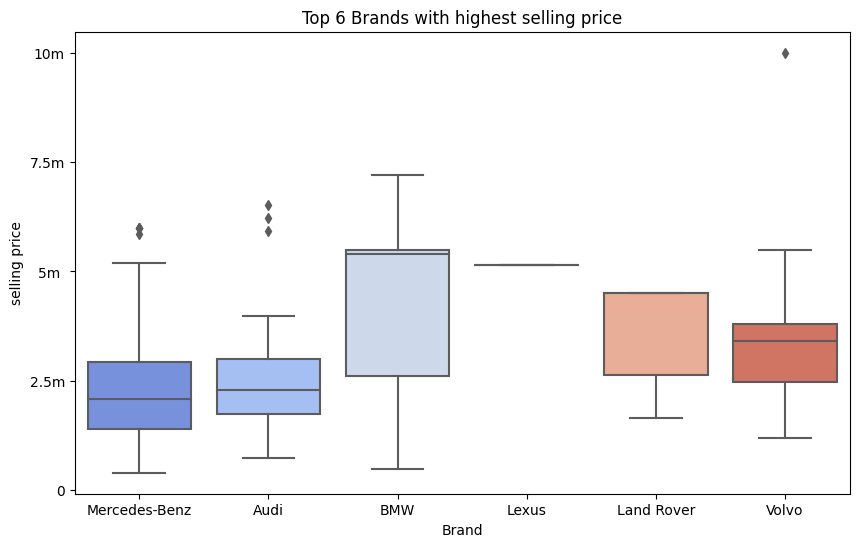

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = brands_max_sp, x = 'Brand', y = 'selling_price', palette  = 'coolwarm')
plt.yticks(np.arange(0, 12000000, 2500000), labels= ['0', '2.5m', '5m ', '7.5m', '10m'])
plt.ylabel('selling price')
plt.title('Top 6 Brands with highest selling price')

([<matplotlib.axis.YTick at 0x7b9135492ef0>,
 [Text(0, 0, '0'),
  Text(0, 2500000, '2.5m'),
  Text(0, 5000000, '5m '),
  Text(0, 7500000, '7.5m'),
  Text(0, 10000000, '10m')])

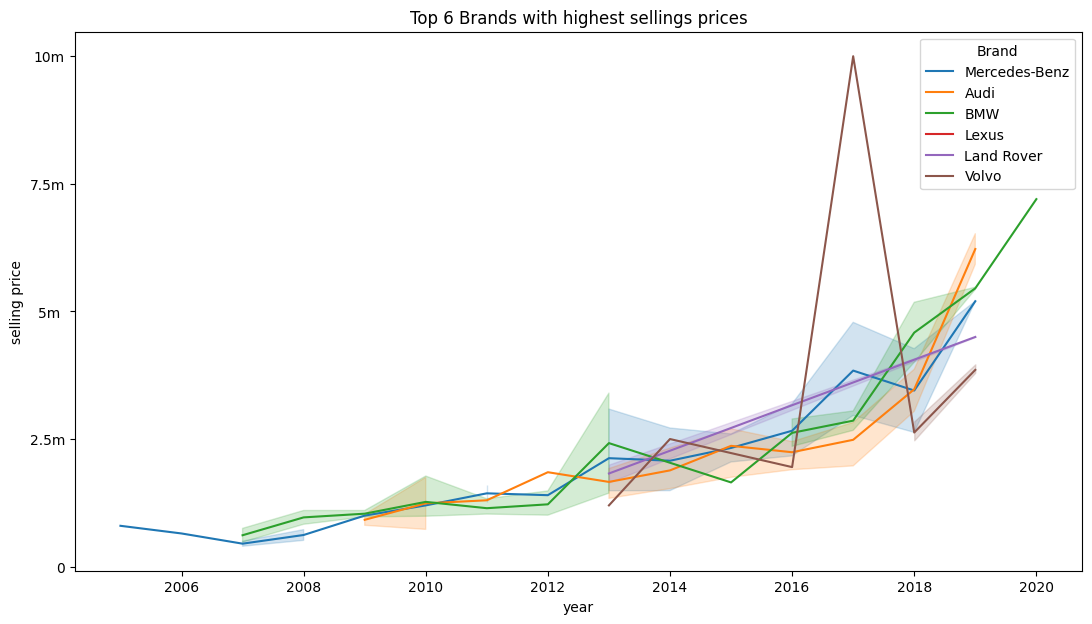

In [ ]:
plt.figure(figsize= (13, 7))
sns.lineplot(data= brands_max_sp, x= 'year', y= 'selling_price', hue= 'Brand')
plt.ylabel('selling price')
plt.title('Top 6 Brands with highest sellings prices')
plt.yticks(np.arange(0, 12000000, 2500000), labels= ['0', '2.5m', '5m ', '7.5m', '10m'])

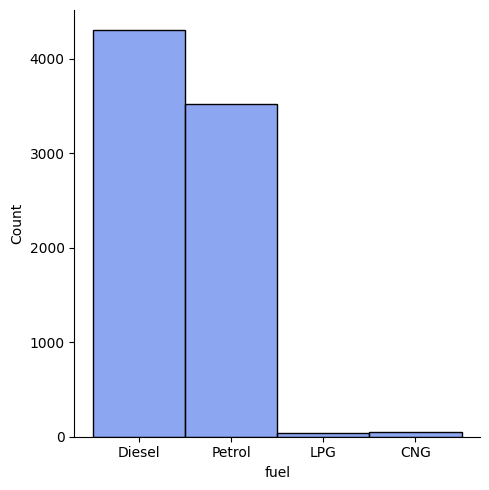

In [ ]:
sns.set_palette('coolwarm')
sns.displot(data= data2, x = 'fuel')


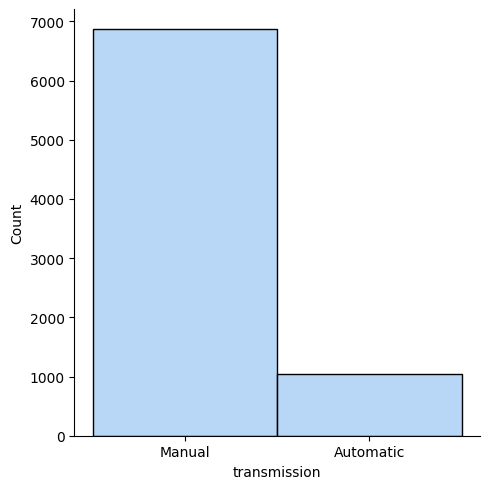

In [ ]:
sns.set_palette('pastel')
sns.displot(data = data2, x = 'transmission')

<Axes: xlabel='Mileage (kmpl)', ylabel='selling_price'>

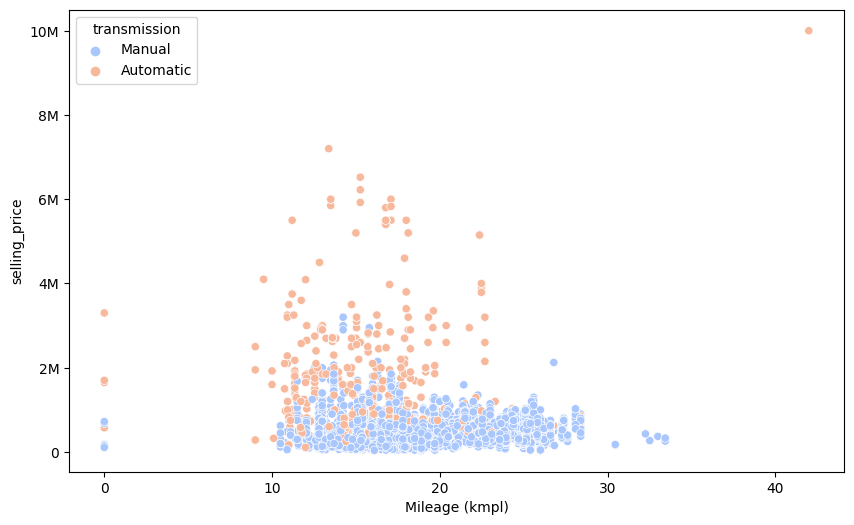

In [ ]:
labels = ['0', '2M', '4M', '6M', '8M', '10M']
ticks = [0, 2000000, 4000000, 6000000, 8000000, 10000000]

plt.figure(figsize= (10, 6))
plt.yticks(ticks = ticks, labels = labels)
plt.xlabel('Mileage (kmpl)')
sns.scatterplot(data= data2, x = 'mileage', y = 'selling_price', hue = 'transmission', palette = 'coolwarm')

Most cars have mileage between 10 - 30 kmpl, and automatic cars typically sell for more than for manual cars.

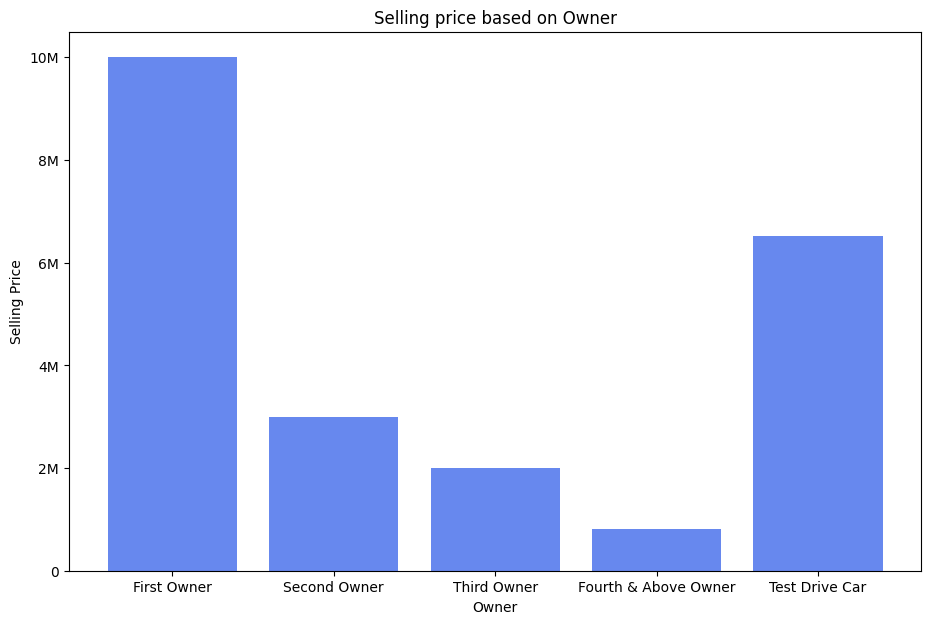

In [ ]:
plt.figure(figsize= (11, 7))
plt.bar(x = data['owner'], height = data['selling_price'])
plt.yticks(ticks = ticks, labels = labels)
plt.title('Selling price based on Owner')
plt.ylabel('Selling Price')
plt.xlabel('Owner')
plt.show()

Not surprising that cars sold by first owners have higher selling prices.


### **Data Pre-Processing**



In the preprocessing phase, I had features like engine, max power, and mileage where the values were in a mixed format of a number and a unit. To make the data compatible with the model, I needed to extract only the numerics, thereby enabling the model to analyze and establish relationships based on the numerical data. Additionally, I performed encoding on categorical features using dummy variables. This encoding step transformed the categorical data into numerical representations, allowing the model to effectively learn patterns and make accurate predictions. This step was crucial for accurately predicting car prices.

In [ ]:
data2[['mileage', 'engine', 'max_power']].head(1)

,mileage,engine,max_power
0,23.4,1248,74.0


In [ ]:
data2['mileage'] = data2.mileage.str.split(' ').str[0].astype(float)            # extracting the mileage numeric value
data2['engine'] = data2.engine.str.split(' ').str[0].astype(int)                # extracting the engine numeric value
data2['max_power'] = data2['max_power'].str.split(' ').str[0].astype(float)     # extracting the max_power numeric value
data2['seats'] = data2['seats'].astype(int)
data2['owner'] = data2.owner.map({
                                  'Test Drive Car' : 0,
                                  'First Owner' : 1,
                                  'Second Owner' : 2,
                                  'Third Owner' : 3,
                                  'Fourth & Above Owner' : 4                    # encoding the categorical values with numerical values
                                 })
df = pd.get_dummies(data= data2)                                                # new dataframe with dummy-encoded variables

# Modeling

In [5]:
X = df.drop(columns = 'selling_price')
y = df['selling_price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Random Forest Regressor**

In [ ]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

preds = rf_reg.predict(X_test)

In [13]:
rmse = mean_squared_error(y_test, preds, squared= False)

print(f" The root mean squared error is  {round(rmse, 2)}\n")
# check % of rmse

print(f'''average of entire feature {round(df['selling_price'].mean(), 2)}''')

rmse_rul_of_thu_perc = (rmse / df['selling_price'].mean()) * 100

print(f'\nThe general rule of thumb puts my RMSE at {round(rmse_rul_of_thu_perc, 2)}% of overall average.')

 The root mean squared error is  127533.97

average of entire feature 649813.72

The general rule of thumb puts my RMSE at 19.63% of overall average.


Feature Importances

In [ ]:
importances = rf_reg.feature_importances_
impo_df = pd.DataFrame(df.drop(columns='selling_price').columns, importances).reset_index()

impo_df.head()

,index,0
0,0.197080,year
1,0.017264,km_driven
2,0.001044,owner
3,0.010601,mileage
4,0.011585,engine


**XGBoost Regressor**

In [14]:
# Train the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'root mean squared error = {round(rmse, 2)}')

perc = (rmse / df['selling_price'].mean()) * 100
print(f'\nThe general rule of thumb puts my RMSE at {round(perc, 2)}% of overall average.')

root mean squared error = 111102.96

The general rule of thumb puts my RMSE at 17.1% of overall average.


Let me remove the name and torque columns and see

In [22]:
df = pd.get_dummies(data= data2.drop(columns = ['name', 'torque']))
df.head(3)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,...,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,450000,145500,1,23.40,1248,74.00,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,2,21.14,1498,103.52,5,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,3,17.70,1497,78.00,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = df.drop(columns = 'selling_price')
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
xgb_regr = xgb.XGBRegressor()
xgb_regr.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared = False)


print(f'root mean squared error = {round(rmse, 2)}')

perc = (rmse / df['selling_price'].mean()) * 100
print(f'\nThe general rule of thumb puts my RMSE at {round(perc, 2)}% of overall average.')

root mean squared error = 191231.12

The general rule of thumb puts my RMSE at 29.43% of overall average.


In [25]:
#  Random Forest Regressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

preds = rf_reg.predict(X_test)
preds

array([405882.94333333, 850417.26190476, 463319.97      , ...,
       471416.66666667, 740000.        , 749350.        ])

In [26]:
rmse = mean_squared_error(y_test, preds, squared = False)
print(round(rmse,2))

perc = (rmse / df['selling_price'].mean()) * 100
print(f'\nThe general rule of thumb puts my RMSE at {round(perc, 2)}% of overall average.')

184584.88

The general rule of thumb puts my RMSE at 28.41% of overall average.


In [29]:
df.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,...,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,450000,145500,1,23.40,1248,74.00,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,2,21.14,1498,103.52,5,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,3,17.70,1497,78.00,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,1,23.00,1396,90.00,5,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,1,16.10,1298,88.20,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
whole_preds = xgb_regr.predict(df.drop(columns= 'selling_price'))
df['predictions'] = whole_preds

<ipython-input-31-8e7a18a80c4e>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data= data2, x = 'year', y = 'selling_price', palette= 'cool_warm', color = 'Blue', label= 'Selling Price')


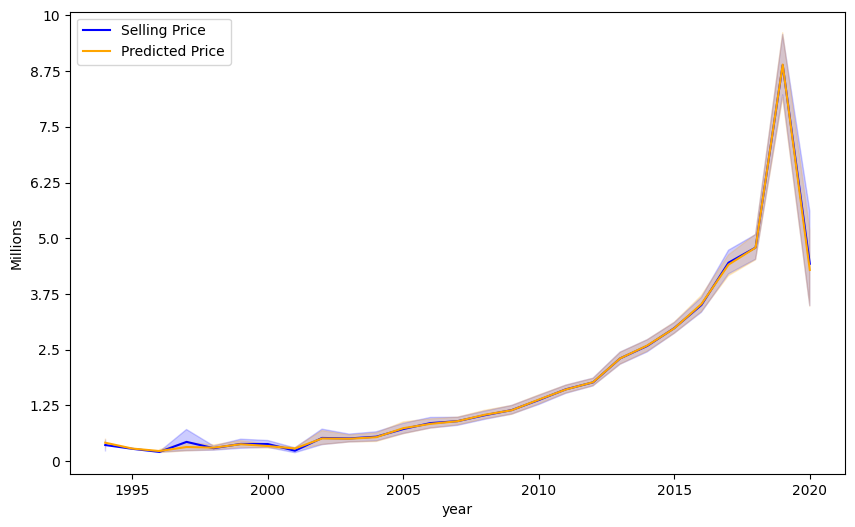

In [31]:
plt.figure(figsize= (10, 6))
sns.lineplot(data= data2, x = 'year', y = 'selling_price', palette= 'cool_warm', color = 'Blue', label= 'Selling Price')
sns.lineplot(data= df, x = 'year', y = 'predictions', color = 'Orange', label= 'Predicted Price')
plt.ylabel('Millions')
plt.yticks([0, 250000, 500000, 750000, 1000000, 1250000,  1500000, 1750000, 2000000], labels = ['0', '1.25', '2.5', '3.75', '5.0', '6.25', '7.5', '8.75', '10'])
plt.legend(loc= 'upper left')

My predictions are not too bad. I am quiet satisfied and I will not be optimizing my model. I believe for the purpose of this project, this plot shows good performance. 🙂